In [1]:
import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline

In [2]:
# NOTE: I did not include the code required for formatting the dogs/cats images
# Define paths to train, validation, and test data
base_dir = 'cats-and-dogs-small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
# PROBLEM 1 and 2
# These problems are very similar and they build on one another, so I've included their code together.

# Set up generators for train and test/train data, using code from 5.2 notebook
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Define all models here for problems 1 and 2 for clarity
# Define models according to specifications, using code from 5.2 notebook
# Base model from code and compile
base_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
base_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

# Add l1 regularization to penultimate dense node and compile
l1_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Add l1 regularization here with custom l1 value
    Dense(512, activation='relu', kernel_regularizer=regularizers.L1(l1=0.0001)),
    Dense(1, activation='sigmoid')
])
l1_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

# Add l1l2 regularization to penultimate dense node and compile
l1l2_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Add l1l2 regularization here with custom l1 value and default l2 value
    Dense(512, activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.0001)),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Fit all models using these settings
# The 5.2 notebook trains the base model with 30 epochs but for comparison, I am setting them all to 15 as per the specificiations of the assignment
steps_epoch = 100
epochs = 15
steps_val = 50

In [5]:
# Fit base model
base_history = base_model.fit(train_generator, steps_per_epoch=steps_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=steps_val)
# Fit l1 model
l1_history = l1_model.fit(train_generator, steps_per_epoch=steps_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=steps_val)
# Fit l2 model
l1l2_history = l1l2_model.fit(train_generator, steps_per_epoch=steps_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=steps_val)

Epoch 1/15
100/100 [==============================] - 34s 339ms/step - loss: 0.6866 - acc: 0.5530 - val_loss: 0.6678 - val_acc: 0.5590
Epoch 2/15
100/100 [==============================] - 32s 317ms/step - loss: 0.6589 - acc: 0.6040 - val_loss: 0.6317 - val_acc: 0.6460
Epoch 3/15
100/100 [==============================] - 32s 319ms/step - loss: 0.6092 - acc: 0.6680 - val_loss: 0.6043 - val_acc: 0.6710
Epoch 4/15
100/100 [==============================] - 33s 326ms/step - loss: 0.5757 - acc: 0.6955 - val_loss: 0.6042 - val_acc: 0.6740
Epoch 5/15
100/100 [==============================] - 33s 328ms/step - loss: 0.5369 - acc: 0.7290 - val_loss: 0.5790 - val_acc: 0.6730
Epoch 6/15
100/100 [==============================] - 32s 324ms/step - loss: 0.5166 - acc: 0.7460 - val_loss: 0.5731 - val_acc: 0.7020
Epoch 7/15
100/100 [==============================] - 33s 333ms/step - loss: 0.4853 - acc: 0.7575 - val_loss: 0.5583 - val_acc: 0.6990
Epoch 8/15
100/100 [==============================] - 3

In [6]:
# Save models for later
base_model.save('catdog_base', save_format='tf')
l1_model.save('catdog_l1', save_format='tf')
l1l2_model.save('catdog_l1l2', save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: catdog_base/assets
INFO:tensorflow:Assets written to: catdog_l1/assets
INFO:tensorflow:Assets written to: catdog_l1l2/assets


<Figure size 432x288 with 0 Axes>

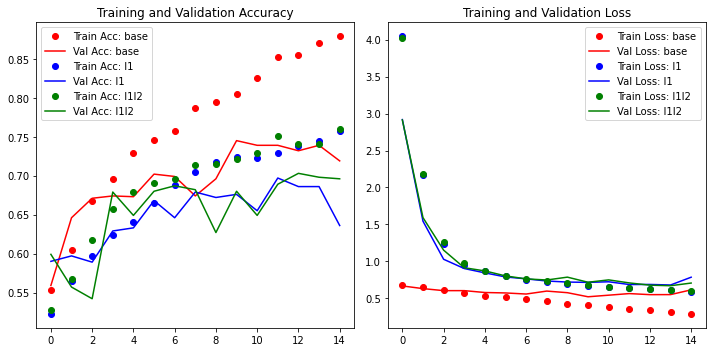

In [7]:
def plot_histories(histories):
    '''Helper function for plotting histories of models for comparison. Shows accuracy in first plot and loss in second.'''
    # Clear any previous plots
    plt.clf()
    # Split into subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    # Loop through history dat and plot
    for history in histories:
        data = history.get('data')
        color = history.get('color')
        name = history.get('name')

        acc = data.history['acc']
        val_acc = data.history['val_acc']
        loss = data.history['loss']
        val_loss = data.history['val_loss']
        epochs_range = range(len(acc))

        ax1.plot(epochs_range, acc, f'{color}o',label=f'Train Acc: {name}')
        ax1.plot(epochs_range, val_acc, color, label=f'Val Acc: {name}')
        ax1.set_title('Training and Validation Accuracy')

        ax2.plot(epochs_range, loss, f'{color}o', label=f'Train Loss: {name}')
        ax2.plot(epochs_range, val_loss, color, label=f'Val Loss: {name}')
        ax2.set_title('Training and Validation Loss')
    ax1.legend()
    ax2.legend()
    fig.tight_layout()

# Store histories data and corresponding config information
histories = [
    {
        'name': 'base',
        'data': base_history,
        'color': 'r'
    },
    {
        'name': 'l1',
        'data': l1_history,
        'color': 'b'
    },
    {
        'name': 'l1l2',
        'data': l1l2_history,
        'color': 'g'
    }
]

plot_histories(histories)

# Responses for problem 1 and probem 2
# This is an interesting comparison. It appears that the base model (without regularization) performs poorly compared to the other two, as it overfits the data. The other two reduce overfitting significantly. The l1 and l1l2 models perform similarly, but it appears the l1l2 model has slightly better accuracy and trains slightly faster. The base model diverges to about 90 percent on the training accuracy (and rising) with the appearance of a plataeu at ~73% validation accuracy (and sloping downwards). l1l2 improves on this without the appearance of such a divergence, implying that the overfitting has been greatly reduced. l1 appears to slope downward at the end, but this might be an artifact of the data at this point. More epochs are needed for a better comparison.

Epoch 1/15
  1/100 [..............................] - ETA: 0s - loss: 0.7272 - acc: 0.6500WARNING:tensorflow:From /usr/local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
100/100 [==============================] - 35s 346ms/step - loss: 0.5882 - acc: 0.7585 - val_loss: 0.6392 - val_acc: 0.7110
Epoch 2/15
100/100 [==============================] - 34s 338ms/step - loss: 0.5807 - acc: 0.7670 - val_loss: 0.6494 - val_acc: 0.7070
Epoch 3/15
100/100 [==============================] - 32s 316ms/step - loss: 0.5677 - acc: 0.7635 - val_loss: 0.6352 - val_acc: 0.7060
Epoch 4/15
100/100 [==============================] - 31s 313ms/step - loss: 0.5501 - acc: 0.7800 - val_loss: 0.7165 - val_acc: 0.6780
Epoch 5/15
100/100 [==============================] - 32s 317ms/step - loss: 0.5402 - acc: 0.7910 - val

<Figure size 432x288 with 0 Axes>

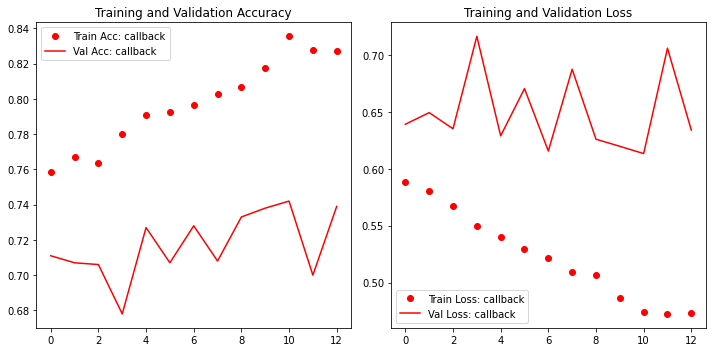

In [8]:
# PROBLEM 3
callbacks_list = [
    EarlyStopping(
        monitor='acc',
        patience=2
    ),
    ModelCheckpoint(
        filepath='./l1_model_checkpoint',
        monitor='val_loss',
        save_best_only=True
    ),
    TensorBoard(
        log_dir='./tensorboard_logs'
    )
]
callback_history = l1_model.fit(
    train_generator, 
    steps_per_epoch=steps_epoch, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=steps_val,
    callbacks=callbacks_list
)

histories = [
    {
        'name': 'callback',
        'data': callback_history,
        'color': 'r'
    }
]
plot_histories(histories)
# This plot is not being compared to anything, as per the specifications of the assignment. It didn't appear to stop early, but model checkpoint and tensorboard callbacks worked as expected. Seeing this graph alone, shows that the l1 is not performing as well as it appears in the previous graph. There is still overfitting. It can be concluded that l1l2 is preferred in this case.

# l1 model has already been saved so I am not doing so here.

# Tensorboard images with results
# Scalars: https://drive.google.com/file/d/1aA5hl28Pph_92d9HTRj_Z8jRTzoI5e37/view?usp=sharing
# Graphs: https://drive.google.com/file/d/1slNOdhJ3Aql7xi5v4U7ikVrizINi5Ziz/view?usp=sharing

Found 2000 images belonging to 2 classes.


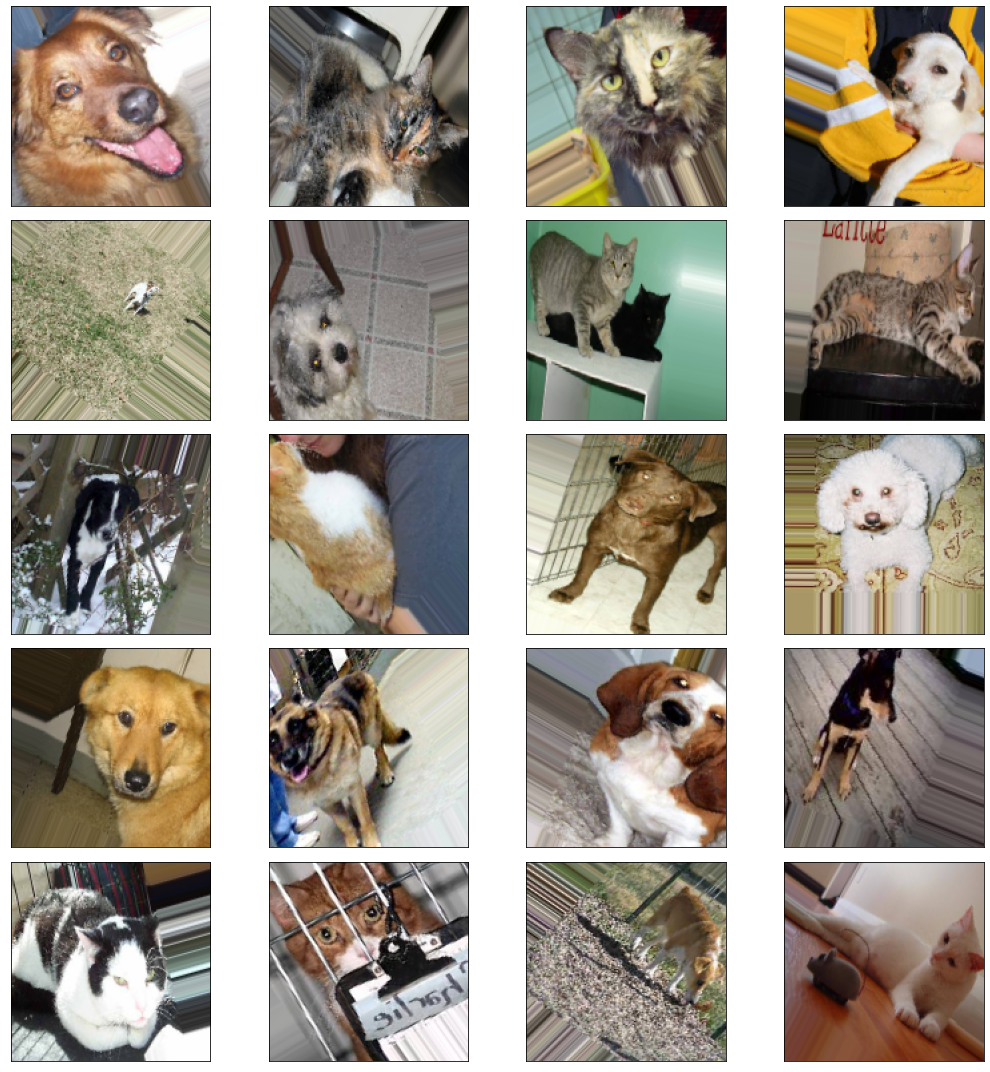

In [20]:
# PROBLEM 4
# Create new generators with image augmentation settings
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator_aug = train_datagen_aug.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Get first batch of images out of generator and plot for display of all image augmentation types
# Batch size is 20, so split into 20 sections

# for i, (x, y) in enumerate(train_generator):
fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(15,15))
for x, y in train_generator_aug:
    *images, = x
    for i, image in enumerate(images):
        row = i % 5
        col = i % 4
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
    break
fig.tight_layout()

In [24]:
# PROBLEM 5
# It's unclear what code the assignment is referring to. And as of 9:30a on Saturday, October 17 piazza post @159 is still unanswered. As such, I am making an assumption and using the code below from notebook 5.3

conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False

chollet_model = models.Sequential()
chollet_model.add(conv_base)
chollet_model.add(layers.Flatten())
chollet_model.add(layers.Dense(256, activation='relu'))
chollet_model.add(layers.Dense(1, activation='sigmoid'))

chollet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

chollet_history = chollet_model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

conv_model = models.Sequential()
conv_model.add(conv_base)
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(256, activation='relu'))
conv_model.add(layers.Dense(1, activation='sigmoid'))

conv_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

conv_history = conv_model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

chollet_model.save('chollet_base', save_format='tf')
conv_model.save('conv_model', save_format='tf')


Epoch 1/30
100/100 - 106s - loss: 0.5005 - acc: 0.7860 - val_loss: 0.3919 - val_acc: 0.8650
Epoch 2/30
100/100 - 110s - loss: 0.3414 - acc: 0.8725 - val_loss: 0.3195 - val_acc: 0.8950
Epoch 3/30
100/100 - 105s - loss: 0.2799 - acc: 0.8990 - val_loss: 0.2864 - val_acc: 0.8970
Epoch 4/30
100/100 - 107s - loss: 0.2427 - acc: 0.9145 - val_loss: 0.2723 - val_acc: 0.8970
Epoch 5/30
100/100 - 111s - loss: 0.2176 - acc: 0.9225 - val_loss: 0.2617 - val_acc: 0.9020
Epoch 6/30
100/100 - 114s - loss: 0.1976 - acc: 0.9355 - val_loss: 0.2653 - val_acc: 0.8930
Epoch 7/30
100/100 - 117s - loss: 0.1799 - acc: 0.9415 - val_loss: 0.2459 - val_acc: 0.9070
Epoch 8/30
100/100 - 107s - loss: 0.1672 - acc: 0.9460 - val_loss: 0.2401 - val_acc: 0.9040
Epoch 9/30
100/100 - 104s - loss: 0.1539 - acc: 0.9515 - val_loss: 0.2419 - val_acc: 0.9100
Epoch 10/30
100/100 - 104s - loss: 0.1438 - acc: 0.9530 - val_loss: 0.2380 - val_acc: 0.9050
Epoch 11/30
100/100 - 104s - loss: 0.1327 - acc: 0.9575 - val_loss: 0.2338 - va

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 64)          294976    
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 15,075,713
Trainable params: 361,025
Non-trainable params: 14,714,688
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

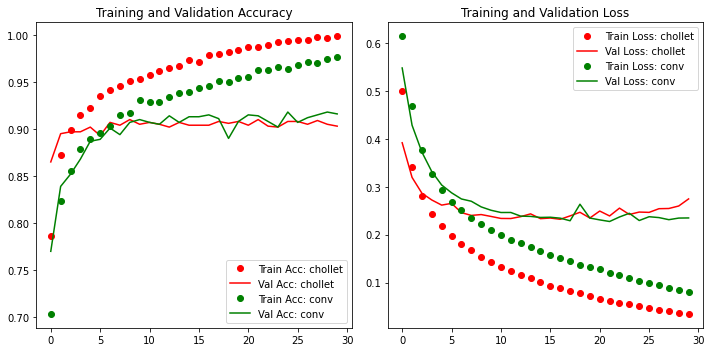

In [34]:
histories = [
    {
        'name': 'chollet',
        'data': chollet_history,
        'color': 'r'
    },
    {
        'name': 'conv',
        'data': conv_history,
        'color': 'g'
    },
]
plot_histories(histories)
# It appears that our conv net overfits less than the chollet net. This is a decent improvement, but it's still not great overall. I would suggest adding dropout and regularization to the final dense network. Very interesting results, though!

# Here is the model summary, which has the number of trainable parameters: 361,025
conv_model.summary()

In [31]:
# PROBLEM 6
# I ran this exact code in colab. The output that you're seeing is from there, along with screenshots of the code.
epochs = 100
conv_base_chollet = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base_chollet.trainable = True

set_trainable = False
for l in conv_base_chollet.layers:
    if l.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        l.trainable = True
    else:
        l.trainable = False

chollet_model_2 = models.Sequential()
chollet_model_2.add(conv_base_chollet)
chollet_model_2.add(layers.Flatten())
chollet_model_2.add(layers.Dense(256, activation='relu'))
chollet_model_2.add(layers.Dense(1, activation='sigmoid'))

chollet_model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

chollet_history_2 = chollet_model_2.fit(
      train_generator,
      steps_per_epoch=steps_epoch,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=steps_val)

chollet_model_2.save('chollet_finetune', save_format='tf')
# Training output has been truncated

Epoch 1/100
100/100 [==============================] - 136s 1s/step - loss: 0.3999 - acc: 0.8325 - val_loss: 0.2768 - val_acc: 0.8880
Epoch 2/100
100/100 [==============================] - 148s 1s/step - loss: 0.2020 - acc: 0.9265 - val_loss: 0.2301 - val_acc: 0.9070
Epoch 3/100
100/100 [==============================] - 145s 1s/step - loss: 0.1343 - acc: 0.9520 - val_loss: 0.1910 - val_acc: 0.9210
Epoch 4/100
100/100 [==============================] - 155s 2s/step - loss: 0.0904 - acc: 0.9715 - val_loss: 0.2367 - val_acc: 0.8980
Epoch 5/100
100/100 [==============================] - 148s 1s/step - loss: 0.0569 - acc: 0.9865 - val_loss: 0.1979 - val_acc: 0.9170
Epoch 6/100
100/100 [==============================] - 145s 1s/step - loss: 0.0363 - acc: 0.9925 - val_loss: 0.1873 - val_acc: 0.9230
Epoch 7/100
100/100 [==============================] - 141s 1s/step - loss: 0.0198 - acc: 0.9980 - val_loss: 0.2112 - val_acc: 0.9200
Epoch 8/100
100/100 [==============================] - 151s 2s

KeyboardInterrupt: 

In [ ]:
conv_base_bryant = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base_bryant.trainable = True

for l in conv_base_bryant.layers:
    if l.name == 'block4_conv3':
        l.trainable = True
    else:
        l.trainable = False

bryant_model = models.Sequential()
bryant_model.add(conv_base_bryant)
bryant_model.add(layers.Flatten())
bryant_model.add(layers.Dense(256, activation='relu'))
bryant_model.add(layers.Dense(1, activation='sigmoid'))

bryant_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

bryant_history = bryant_model.fit(
      train_generator,
      steps_per_epoch=steps_epoch,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=steps_val)

bryant_model.save('bryant_finetune', save_format='tf')
# Training output has been truncated

In [ ]:
histories = [
    {    {
        'name': 'chollet_2',
        'data': chollet_history_2,
        'color': 'r'
    },
    {
        'name': 'conv',
        'data': bryant_history,
        'color': 'g'
    },
]
plot_histories(histories)
# Screenshots from colab notebook, showing comparison
# https://drive.google.com/file/d/1ke2elZIaYp2YS2avyAgBtd502iaDOgsf/view?usp=sharing
# The training accuracy is hard to see, but the validation is interesting. It's clear that overall they are similar, but the chollet model takes a real dive early on. This is also shown in the loss. Overall, I would prefer the chollet model, given that it appears to diverge less and achieve a higher overall accuracy.